# 1)PIPELINE: Sourcing and loading

In [1]:
import pandas as pd
import numpy as np
RECOM = pd.read_csv('recom.csv')
print(RECOM.isnull().sum())
print("total number of Rows and Columns in the dataframe: " , RECOM.shape)
RECOM
# https://realpython.com/build-recommendation-engine-collaborative-filtering/
# https://towardsdatascience.com/recommendation-systems-explained-a42fc60591ed
# https://www.geeksforgeeks.org/recommendation-system-in-python/
# https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas

Unnamed: 0            0
Main_ID               0
Transaction_ID        0
Date                  0
Price                 0
Code_Product          0
Amount                0
ItemKey           21403
dtype: int64
total number of Rows and Columns in the dataframe:  (50000, 8)


,Unnamed: 0,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey
0,0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0
1,1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,NaN
2,2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0
3,3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,NaN
4,4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,NaN
...,...,...,...,...,...,...,...,...
49995,49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0
49996,49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,NaN
49997,49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5
49998,49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,NaN


# 2)PIPELINE: Data cleaning and editing

In [2]:
#Fixed the dataframe by dropping two unnecessary columns. 
RECOM= RECOM.drop(['Unnamed: 0', 'ItemKey'], axis=1)
# Editing a column by first changing its type then creating new columns out of it
RECOM['Date'] =pd.to_datetime(RECOM['Date'])
RECOM['Time'] = RECOM['Date'].dt.time
RECOM['DATE'] =RECOM['Date'].dt.date
RECOM= RECOM.drop(['Date'], axis=1)
# renamed the 'DATE' column to 'Date'
RECOM = RECOM.rename(columns={'DATE': 'Date'})
RECOM

,Main_ID,Transaction_ID,Price,Code_Product,Amount,Time,Date
0,90fada91,264f7a69,125.0,5002.0,1.0,20:53:49.153000,2022-10-07
1,9006f9ac,45c7d853,19.0,35012.0,1.0,15:54:57.187000,2022-09-17
2,32270891,61ad76dd,141.0,5005.0,1.0,13:51:55.667000,2022-11-28
3,97e03e47,41ee09f6,4.5,35078.5,1.0,16:20:22.110000,2022-09-12
4,41949228,244fe6d8,129.5,49291.5,5.0,18:53:43.933000,2022-10-14
...,...,...,...,...,...,...,...
49995,bb127ffb,4e0eb5ab,111.5,45004.0,4.0,21:48:20.847000,2022-09-24
49996,a8bc484a,c9946c16,34.0,49292.0,1.0,19:49:01.973000,2022-11-18
49997,c983862a,d1a35c5c,178.0,5001.5,1.0,20:02:43.023000,2022-11-24
49998,8821da12,66f9b474,26.0,49291.5,1.0,13:07:01.423000,2022-11-06


# 3)PIPELINE: Transforming and visualizing

In [3]:
# Concised the dataframe into groupings and aggregation for further processes.
RECOM_x = RECOM.groupby('Code_Product').agg(
    customers_IDs=('Main_ID', 'nunique'),
    quantity=('Amount', 'sum')
).sort_values(by='customers_IDs', ascending=False)

print(RECOM['Code_Product'].nunique(), ": Is the Total number of Unique values of Product_code columns")
print(RECOM['Main_ID'].nunique(), ": Is the Total number of Unique values of Customer Main_ID columns")
# https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas

RECOM_x

333 : Is the Total number of Unique values of Product_code columns
28514 : Is the Total number of Unique values of Customer Main_ID columns


,customers_IDs,quantity
Code_Product,,
49292.0,4270,6006.0
49291.5,4127,5706.0
5000.5,3159,4730.0
45004.0,2732,4507.0
10013.0,1454,1713.0
...,...,...
40052.5,1,1.0
165001.0,1,1.0
35085.5,1,1.0


In [4]:
# created a pivot tableh
RECOM_items = RECOM_x.pivot_table(index='customers_IDs', columns=['Code_Product'],values='quantity').fillna(0)
RECOM_items
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Code_Product,5000.5,5001.0,5001.5,5002.0,5002.5,5003.0,5004.0,5004.5,5005.0,5007.0,...,200035.5,200037.0,200037.5,200038.0,200038.5,200045.5,200046.0,200046.5,200047.0,350027.5
customers_IDs,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3159,4730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Just to see and have an idea of how many products are interlinked witht the other that gives the highest correlation

In [5]:
# Calculated the correlation matrix using the default method (Pearson)
corr_matrix = RECOM_items.corr()

# Print the correlation matrix with the highest coreelation with other products
corr_matrix.where(lambda x: x == 1).sum()

c=corr_matrix
s=c.unstack()
so=s.sort_values(kind="quicksort")
print(so.where(lambda x: x == 1).sum(), ': is the total number of products that have the highest correlation (~1) with eachothers.')
so
# ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

2101.0 : is the total number of products that have the highest correlation (~1) with eachothers.


Code_Product  Code_Product
10006.0       60047.5        -0.007752
60047.5       10006.0        -0.007752
35090.5       20034.5        -0.007752
20034.5       35090.5        -0.007752
35088.0       40073.0        -0.007752
                                ...   
200037.5      60048.0         1.000000
10022.0       20034.5         1.000000
20034.5       10022.0         1.000000
60048.0       200037.5        1.000000
35012.0       20034.5         1.000000
Length: 110889, dtype: float64

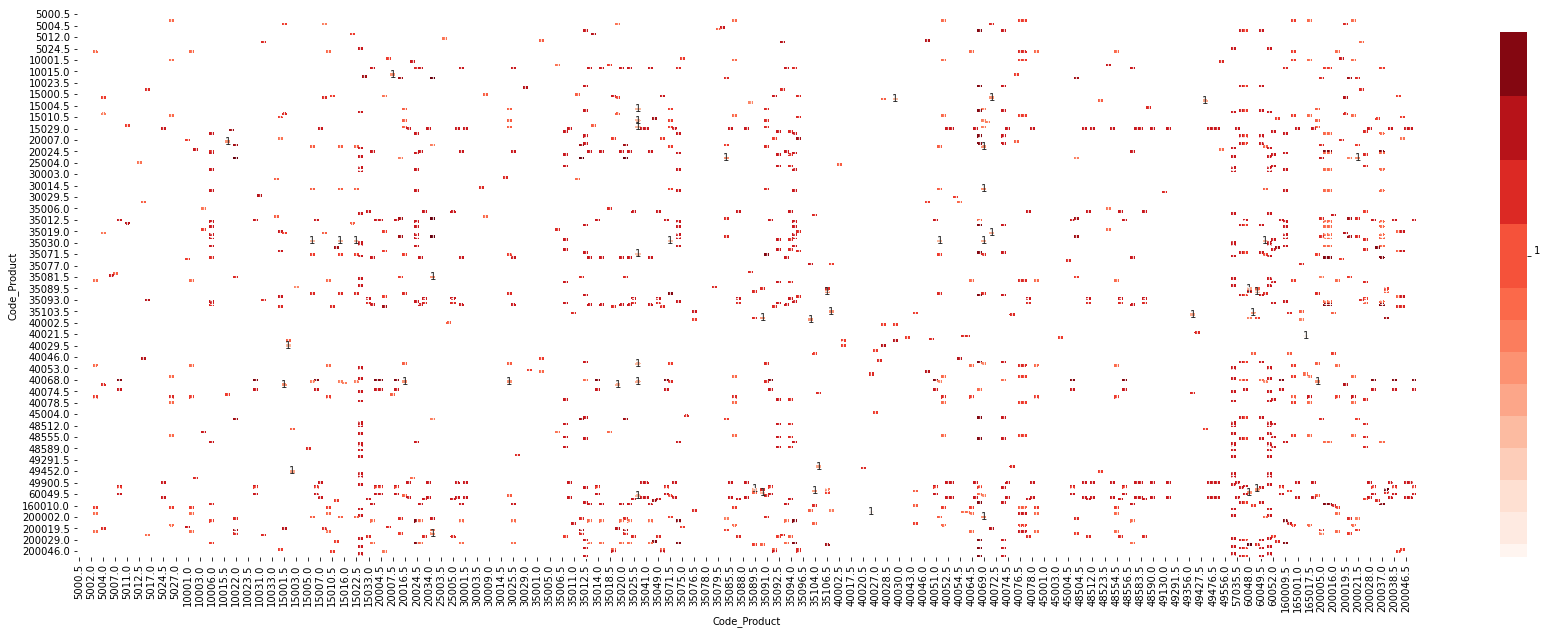

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

filteredDf = corr_matrix[((corr_matrix >= .5) | (corr_matrix <= -0.5)) & (corr_matrix !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

# 4)PIPELINE: Generating RS Model for non purchased item to customers from corr-matrix

In [7]:
corr_matrix  

Code_Product,5000.5,5001.0,5001.5,5002.0,5002.5,5003.0,5004.0,5004.5,5005.0,5007.0,...,200035.5,200037.0,200037.5,200038.0,200038.5,200045.5,200046.0,200046.5,200047.0,350027.5
Code_Product,,,,,,,,,,,,,,,,,,,,,
5000.5,1.000000,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752
5001.0,-0.007752,1.000000,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752
5001.5,-0.007752,-0.007752,1.000000,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752
5002.0,-0.007752,-0.007752,-0.007752,1.000000,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752
5002.5,-0.007752,-0.007752,-0.007752,-0.007752,1.000000,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200045.5,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,1.000000,1.000000,-0.007752,-0.007752,-0.007752
200046.0,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,1.000000,1.000000,-0.007752,-0.007752,-0.007752
200046.5,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,-0.007752,...,-0.007752,-0.007752,-0.007752,1.000000,-0.007752,-0.007752,-0.007752,1.000000,1.000000,-0.007752


# Building simple RS

In [8]:
# Function for each row, found the 10 highest correlated items

def find_top_10_corr(item):
    return corr_matrix[item].nlargest(10).index.tolist()


# Grouped the original dataframe, RECOM, by customer id and aggregated the purchase history as a list
grouped_df = RECOM.groupby("Main_ID")["Code_Product"].apply(list).reset_index()
print(grouped_df)
# For each customer, iterated over their purchase history and found the highest correlated 10 items for each item
# Stored the results in a new column as a nested list
grouped_df["highest_corr_10_items"] = grouped_df["Code_Product"].apply(lambda x: [find_top_10_corr(item) for item in x])
grouped_df.head(10)

        Main_ID        Code_Product
0      00024de6           [35097.0]
1      00084856  [49291.5, 49292.0]
2      0008e848           [40002.0]
3      00096930           [49291.5]
4      000c66b7   [45001.0, 5002.0]
...         ...                 ...
28509  fff8b1c4           [35077.0]
28510  fff905d0           [49292.0]
28511  fff9726b  [45001.5, 30003.0]
28512  fffa332b           [49556.0]
28513  ffff4aa9            [5009.0]

[28514 rows x 2 columns]


,Main_ID,Code_Product,highest_corr_10_items
0,00024de6,[35097.0],"[[5004.5, 35097.0, 15005.5, 15008.5, 15010.5, ..."
1,00084856,"[49291.5, 49292.0]","[[49291.5, 5013.0, 10015.5, 35088.0, 40054.5, ..."
2,0008e848,[40002.0],"[[40002.0, 5027.5, 35075.5, 45004.5, 5023.0, 1..."
3,00096930,[49291.5],"[[49291.5, 5013.0, 10015.5, 35088.0, 40054.5, ..."
4,000c66b7,"[45001.0, 5002.0]","[[45001.0, 40028.5, 20005.5, 40072.0, 45013.5,..."
5,000e98ee,"[49291.5, 49292.0]","[[49291.5, 5013.0, 10015.5, 35088.0, 40054.5, ..."
6,00165e2e,[35078.0],"[[35078.0, 15003.0, 35027.0, 30029.0, 35075.0,..."
7,00171ffd,[49556.0],"[[49556.0, 165016.5, 5013.0, 10015.5, 15000.5,..."
8,0019e439,"[10015.0, 5012.0]","[[10015.0, 5013.0, 10015.5, 35088.0, 40054.5, ..."
9,001a93a4,[45002.5],"[[45002.5, 5013.0, 10015.5, 35076.5, 35088.0, ..."


In [9]:
# Import the random module
import random

# Created a new column to store the extracted values
grouped_df['RECOMENDED_ITEMS'] = [
    # For each row, got the list of lists from the highest_corr_10_items column
    [
        # For each sublist, got random 8 elements that are not in the Code_Product column
        random.choices([x for x in sublist if x not in code_product], k=8)
        # Iterated over the list of lists
        for sublist in highest_corr
    ]
    # Iterated over the rows of the grouped_df
    for highest_corr, code_product in zip(grouped_df['highest_corr_10_items'], grouped_df['Code_Product'])
]

# ref: https://stackoverflow.com/questions/53889227/remove-elements-from-a-list-in-pandas-dataframe

In [10]:
grouped_df

,Main_ID,Code_Product,highest_corr_10_items,RECOMENDED_ITEMS
0,00024de6,[35097.0],"[[5004.5, 35097.0, 15005.5, 15008.5, 15010.5, ...","[[40051.5, 5004.5, 5004.5, 15022.5, 5004.5, 40..."
1,00084856,"[49291.5, 49292.0]","[[49291.5, 5013.0, 10015.5, 35088.0, 40054.5, ...","[[40054.5, 5007.0, 35002.5, 35088.0, 35002.5, ..."
2,0008e848,[40002.0],"[[40002.0, 5027.5, 35075.5, 45004.5, 5023.0, 1...","[[15004.5, 30003.0, 5027.5, 35075.5, 35001.0, ..."
3,00096930,[49291.5],"[[49291.5, 5013.0, 10015.5, 35088.0, 40054.5, ...","[[40028.5, 20005.5, 5007.0, 40028.5, 5007.0, 2..."
4,000c66b7,"[45001.0, 5002.0]","[[45001.0, 40028.5, 20005.5, 40072.0, 45013.5,...","[[40028.5, 49452.0, 20005.5, 200013.5, 49452.0..."
...,...,...,...,...
28509,fff8b1c4,[35077.0],"[[35077.0, 40017.5, 165016.5, 5005.0, 40043.0,...","[[5011.0, 165017.0, 165017.0, 40017.5, 5005.0,..."
28510,fff905d0,[49292.0],"[[49292.0, 5013.0, 10015.5, 35088.0, 40028.5, ...","[[5002.5, 40054.5, 5015.0, 35088.0, 40028.5, 1..."
28511,fff9726b,"[45001.5, 30003.0]","[[45001.5, 40028.5, 165016.5, 15004.0, 40028.0...","[[200019.0, 35002.5, 5007.0, 200019.0, 15004.0..."
28512,fffa332b,[49556.0],"[[49556.0, 165016.5, 5013.0, 10015.5, 15000.5,...","[[40054.5, 35088.0, 5013.0, 35076.5, 40054.0, ..."


# 5)PIPELINE: Evaluating , concluding or Validating the model 

In [13]:
# Validation of the RS 
df = pd.DataFrame({'A': [1, 2, 3], 'B': [[[4, 5, 6], [7, 8, 9]],[[3,5,4],[5,6,8]],[[2,5,8], [10, 11, 12]]], 'C': [[5, 8],[6,5],[7, 10]]})
df

,A,B,C
0,1,"[[4, 5, 6], [7, 8, 9]]","[5, 8]"
1,2,"[[3, 5, 4], [5, 6, 8]]","[6, 5]"
2,3,"[[2, 5, 8], [10, 11, 12]]","[7, 10]"


In [14]:
df['D'] = df.apply(lambda x: [[y for y in z if y not in x['C']] for z in x['B']], axis=1)
df

,A,B,C,D
0,1,"[[4, 5, 6], [7, 8, 9]]","[5, 8]","[[4, 6], [7, 9]]"
1,2,"[[3, 5, 4], [5, 6, 8]]","[6, 5]","[[3, 4], [8]]"
2,3,"[[2, 5, 8], [10, 11, 12]]","[7, 10]","[[2, 5, 8], [11, 12]]"


In [15]:
grouped_df['e'] = grouped_df.explode('highest_corr_10_items').apply(lambda x: [y for y in x['highest_corr_10_items'] if y not in x['Code_Product']], axis=1).groupby(level=0).agg(list)
grouped_df['Recommended Products'] = grouped_df.apply(lambda x: [[y for y in z if y not in x['Code_Product']] for z in x['highest_corr_10_items']], axis=1)
x = grouped_df.loc[(grouped_df['Main_ID']=='fffa332b')|(grouped_df['Main_ID']=='')]
print(x['Code_Product'].tolist(), "Code Prdct")
print(x['highest_corr_10_items'].tolist(), "10 highest corr")
print(x['Recommended Products'].tolist(), "Recom products-testing2")
print(x['e'].tolist(), "e-validation")
print(x['RECOMENDED_ITEMS'].tolist(), "random one")

[[49556.0]] Code Prdct
[[[49556.0, 165016.5, 5013.0, 10015.5, 15000.5, 35076.5, 35088.0, 40054.0, 40054.5, 35106.0]]] 10 highest corr
[[[165016.5, 5013.0, 10015.5, 15000.5, 35076.5, 35088.0, 40054.0, 40054.5, 35106.0]]] Recom products-testing2
[[[165016.5, 5013.0, 10015.5, 15000.5, 35076.5, 35088.0, 40054.0, 40054.5, 35106.0]]] e-validation
[[[40054.5, 35088.0, 5013.0, 35076.5, 40054.0, 40054.5, 35106.0, 5013.0]]] random one


# References and notes: 

In [11]:
# ref: https://ecyang.medium.com/similar-product-recommendations-data-to-deployment-970a085bafce
# ref: https://medium.com/codex/product-recommendation-using-market-basket-analysis-a-practical-guide-f1b76209b299
# ref: https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas
# https://www.youtube.com/watch?v=v_mONWiFv0k


# put main_ID in the RECOM_x, ROWS WILL BE CUSTOMER, COLUMNS WILL BE PRODUCT, CORRELATION MATRIX,coding, 
# pick one product out of 332, pick 100 highest corr with product. 
# go back to customers, form a list of customers that purchased. then look each indiv purchase history. recommned the highest correlated product. 
# recommend atleats of three items of the highest correls.

# read on RFM tables= recency, frequcny, magnitude/money tables for reccm systems. 5 bins and the score 5 , recency, fre, magn
# 

# row by row find 10 highest correlated items for each 
# customer database , find out purchase history of each customer and for each hist, check the highest correlated 10 items in that
# then pick the one the 3 most highest correlated and then they are not in the customer history
